In [11]:
import numpy as np
import random
import gym
import math
from collections import defaultdict, deque
import matplotlib.pyplot as graph

In [12]:
env = gym.make("BipedalWalker-v3", hardcore=True)
env.reset()

stateBounds = [(0, math.pi),
        (-2,2),
        (-1,1),
        (-1,1),
        (0,math.pi),
        (-2,2),
        (0, math.pi),
        (-2,2),
        (0,1),
        (0, math.pi),
        (-2, 2),
        (0, math.pi),
        (-2, 2),
        (0, 1)]

actionBounds = (-1, 1)

In [13]:
EPISODES = 1000
GAMMA =  0.99
ALPHA = 0.01
HIGHSCORE = -200

In [14]:
def updateQTable (Qtable, state, action, reward, nextState=None):
    current = Qtable[state][action]  
    qNext = np.max(Qtable[nextState]) if nextState is not None else 0
    target = reward + (GAMMA * qNext)
    new_value = current + (ALPHA * (target - current))
    return new_value

In [15]:
def getNextAction(qTable, epsilon, state):

    if random.random() < epsilon:

        action = ()
        for i in range (0, 4):
            action += (random.randint(0, 9),)

    else:

        action = np.unravel_index(np.argmax(qTable[state]), qTable[state].shape)

    return action


In [16]:
def discretizeState(state):

    discreteState = []

    for i in range(len(state)):

        index = int((state[i]-stateBounds[i][0])  / (stateBounds[i][1]-stateBounds[i][0])*19)
        discreteState.append(index)
    
    return tuple(discreteState)

In [17]:
def convertNextAction(nextAction):
    action = []

    for i in range(len(nextAction)):

        nextVal = nextAction[i] / 9 * 2 - 1

        action.append(nextVal)

    return tuple(action)

In [18]:
def plotEpisode(myGraph, xval, yval, epScore, plotLine, i):

    xval.append(i)
    yval.append(epScore)

    plotLine.set_xdata(xval)
    plotLine.set_ydata(yval)
    myGraph.savefig("./plot")

In [19]:
def runAlgorithmStep(env, i, qTable, doRender,HIGHSCORE):
    if(doRender):
        env.render()

    print("Episode #: ", i)

    state = discretizeState(env.reset()[0:14])
    total_reward=  0
    epsilon = 1.0 / ( i * .004)

    while True:
        
        nextAction = convertNextAction(getNextAction(qTable, epsilon, state))
        nextActionDiscretized = getNextAction(qTable, epsilon, state)
        nextState, reward, done, info = env.step(nextAction)
        nextState = discretizeState(nextState[0:14])
        total_reward += reward
        qTable[state][nextActionDiscretized] = updateQTable(qTable, state, nextActionDiscretized, reward, nextState)
        state = nextState
        if done:
                break
    
    if total_reward > HIGHSCORE:

        HIGHSCORE = total_reward

    return total_reward

Episode #:  1


TypeError: only size-1 arrays can be converted to Python scalars

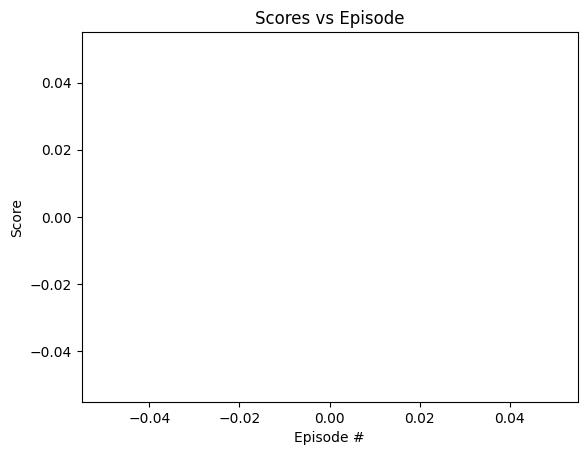

In [20]:
visualize = input("Visualize? [y/n]\n")

if visualize == 'y':
    doRender = True
else:
    doRender = False
    
qTable = defaultdict( lambda: np.zeros((10, 10, 10, 10)))

myGraph = graph.figure()
xval, yval = [], []
mySubPlot = myGraph.add_subplot()
graph.xlabel("Episode #")
graph.ylabel("Score")
graph.title("Scores vs Episode")
plotLine, = mySubPlot.plot(xval, yval)
# mySubPlot.set_xlim([0, EPISODES])
# mySubPlot.set_ylim([-220, -80])


for i in range(1, EPISODES + 1):

    epScore = runAlgorithmStep(env, i, qTable, doRender,HIGHSCORE)
    print("Episode finished. Now plotting..")
    plotEpisode(myGraph, xval, yval, epScore, plotLine, i)

print("All episodes finished. Highest score achieved: " + str(HIGHSCORE))